In [1]:
import pandas as pd
import chess
import chess.pgn
import io
import numpy as np


In [2]:
board = chess.Board()

#print(board.legal_moves)
#board.push('g1f3')


# Analyse du pourcentage de victoire en fonction de l'ouverture

In [3]:
#games = open('games_short.pgn', encoding='utf-8')
df = pd.DataFrame(columns=['Opening', 'Result'])
games = open('lichess_elite_2020-06.pgn')
for k in range(200) :
   game = chess.pgn.read_game(games)
   print(game.headers['Opening'], game.headers['Result'])
   df.loc[len(df.index)] = [game.headers['Opening'],  game.headers['Result']]




mapping = {'1-0' : 1, '1/2-1/2' :0, '0-1' : -1}
df.Result = df.Result.map(mapping)

#print(df)


French Defense: Winawer Variation, Poisoned Pawn Variation 1/2-1/2
Sicilian Defense 1-0
Modern Defense: Standard Line 1/2-1/2
Queen's Gambit Declined 0-1
Dutch Defense: Semi-Leningrad Variation 1-0
Caro-Kann Defense: Two Knights Attack 0-1
Sicilian Defense: French Variation, Westerinen Attack 1-0
Nimzowitsch Defense: Williams Variation 0-1
French Defense: Advance Variation 0-1
King's Indian Defense: Orthodox Variation, Glek Defense 0-1
Queen's Pawn Game: Krause Variation 0-1
King's Indian Defense: Normal Variation 1-0
French Defense: Classical Variation, Steinitz Variation 0-1
Scotch Game: Classical Variation, Intermezzo Variation 1-0
Queen's Pawn Game: London System 1-0
Scandinavian Defense: Mieses-Kotroc Variation 1-0
Trompowsky Attack 1/2-1/2
Italian Game: Scotch Gambit, Nakhmanson Gambit 0-1
French Defense: Winawer Variation, Winckelmann-Riemer Gambit 1-0
King's Gambit Accepted, Schallopp Defense 0-1
Czech Defense 1/2-1/2
Semi-Slav Defense 0-1
French Defense: Tarrasch Variation, Ch

In [4]:
df.loc[(df.Opening == 'Sicilian Defense') & (df.Result == 1) ]

,Opening,Result
1,Sicilian Defense,1


In [5]:

openings = df.Opening.unique()
openings
list_ = []
for opening in openings :
    list_.append([opening,len(df.loc[(df.Opening == opening) & (df.Result == 1)]), len(df.loc[(df.Opening == opening) & (df.Result == 0)]), len(df.loc[(df.Opening == opening) & (df.Result == -1)])])

list_
#df.value_counts('Opening')


[['French Defense: Winawer Variation, Poisoned Pawn Variation', 0, 1, 0],
 ['Sicilian Defense', 1, 0, 0],
 ['Modern Defense: Standard Line', 0, 2, 0],
 ["Queen's Gambit Declined", 0, 0, 1],
 ['Dutch Defense: Semi-Leningrad Variation', 1, 0, 0],
 ['Caro-Kann Defense: Two Knights Attack', 0, 0, 1],
 ['Sicilian Defense: French Variation, Westerinen Attack', 1, 0, 0],
 ['Nimzowitsch Defense: Williams Variation', 0, 0, 1],
 ['French Defense: Advance Variation', 0, 0, 1],
 ["King's Indian Defense: Orthodox Variation, Glek Defense", 0, 0, 1],
 ["Queen's Pawn Game: Krause Variation", 0, 0, 1],
 ["King's Indian Defense: Normal Variation", 1, 0, 0],
 ['French Defense: Classical Variation, Steinitz Variation', 0, 0, 1],
 ['Scotch Game: Classical Variation, Intermezzo Variation', 1, 0, 0],
 ["Queen's Pawn Game: London System", 1, 0, 1],
 ['Scandinavian Defense: Mieses-Kotroc Variation', 1, 0, 0],
 ['Trompowsky Attack', 0, 1, 0],
 ['Italian Game: Scotch Gambit, Nakhmanson Gambit', 0, 0, 1],
 ['Fren

Ici, on ne retient que l'ouverture générale

In [6]:
df2 = df.copy()
df2.Opening = df2.Opening.apply(lambda x : x[0:1+x.find(":")])
openings = df2.Opening.unique()

list_ = []
for opening in openings :
    if opening != '' :
       n = len(df2.loc[df2.Opening == opening])
       list_.append([opening,len(df2.loc[df2.Opening == opening]),len(df2.loc[(df2.Opening == opening) & (df2.Result == 1)])/n, len(df2.loc[(df2.Opening == opening) & (df2.Result == 0)])/n, len(df2.loc[(df2.Opening == opening) & (df2.Result == -1)])/n])

Results_df = pd.DataFrame(columns = ['Opening', 'Number of games', 'White wins', 'Draw', 'Black wins'])

for opening in list_ :
    Results_df.loc[len(Results_df.index)] = [opening[0], opening[1], str(100*round(opening[2],4)) + '%', str(100*round(opening[3],4)) + '%', str(100*round(opening[4],4)) + '%']

Results_df
    



,Opening,Number of games,White wins,Draw,Black wins
0,French Defense:,6,16.669999999999998%,16.669999999999998%,66.67%
1,Modern Defense:,7,14.29%,28.57%,57.14%
2,Dutch Defense:,3,66.67%,0.0%,33.33%
3,Caro-Kann Defense:,7,57.14%,0.0%,42.86%
4,Sicilian Defense:,24,25.0%,8.33%,66.67%
5,Nimzowitsch Defense:,1,0.0%,0.0%,100.0%
6,King's Indian Defense:,11,63.63999999999999%,0.0%,36.36%
7,Queen's Pawn Game:,8,25.0%,12.5%,62.5%
8,Scotch Game:,5,80.0%,20.0%,0.0%
9,Scandinavian Defense:,6,50.0%,0.0%,50.0%


# Analyse de l'ELO

array([[<AxesSubplot:title={'center':'Elo'}>]], dtype=object)

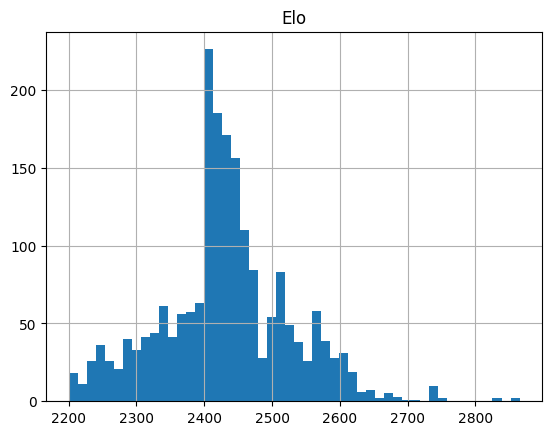

In [7]:
df = pd.DataFrame(columns=['Elo'])
games = open('lichess_elite_2020-06.pgn')
for k in range(1000) :
   game = chess.pgn.read_game(games)
   #print(game.headers['Opening'], game.headers['Result'])
   df.loc[len(df.index)] = [int(game.headers['WhiteElo'])]
   df.loc[len(df.index)] = [int(game.headers['BlackElo'])]

df.hist(bins = 50)

# Clusters de joueurs

In [8]:
df_players = pd.DataFrame(columns=['Opening', 'Result'])
games = open('lichess_elite_2020-06.pgn')
dico_vs = {}
for k in range(100) :
   game = chess.pgn.read_game(games)
   black = game.headers['Black']
   white = game.headers['White']

   # création d'un dico des adversaires + nbr de parties jouées en parcourant les joueurs noirs
   if black not in dico_vs :
      dico_vs[black] = {white : 1}
   elif white not in dico_vs[black] :
      dico_vs[black][white] = 1
   elif white in dico_vs[black]:
      dico_vs[black][white] += 1

   # idem en parcourant les joueurs blancs (on aura les infos en double et une matrice d'adjacence symétrique mais on en a besoin pour tracer le graphe)
   if white not in dico_vs :
      dico_vs[white] = {black : 1}
   elif black not in dico_vs[white] :
      dico_vs[white][black] = 1
   elif black in dico_vs[white]:
      dico_vs[white][black] += 1


print(dico_vs)

{'matapalo': {'Cor64': 1}, 'Cor64': {'matapalo': 1, 'pabloin': 1}, 'Germanvince': {'Poecraft94': 1}, 'Poecraft94': {'Germanvince': 1}, 'yendorzerep': {'sandstorm00': 1, 'Majasystem': 1}, 'sandstorm00': {'yendorzerep': 1, 'hblanco': 1}, 'Dapsay': {'DanielaAndrade': 3}, 'DanielaAndrade': {'Dapsay': 3}, 'gmbalaargentino': {'SuperRuddy': 2}, 'SuperRuddy': {'gmbalaargentino': 2}, 'EnPassant81': {'Andnar': 1}, 'Andnar': {'EnPassant81': 1}, 'self_service': {'CamelClutcher': 1, 'Tsovnoog': 1}, 'CamelClutcher': {'self_service': 1}, 'No_Move_Left': {'LePersifleur': 1}, 'LePersifleur': {'No_Move_Left': 1}, 'Fasmc17': {'Mjolnir1980': 1}, 'Mjolnir1980': {'Fasmc17': 1}, 'Rechlis': {'FO_Junior': 1, 'AitorRO': 1, 'extremo2': 1, 'Alfilparanoico': 1}, 'FO_Junior': {'Rechlis': 1}, 'akiskara': {'Odirovski': 2}, 'Odirovski': {'akiskara': 2, 'Ryan-Rhys': 1}, 'Lucuix21': {'MrBug': 1, 'MATAGORDO': 1}, 'MrBug': {'Lucuix21': 1}, 'Arrubarena': {'arbarsinoe': 1}, 'arbarsinoe': {'Arrubarena': 1}, 'XadrezValle': {'

In [9]:
list(dico_vs).index('Cor64')

1

In [10]:
# création d'une matrice d'adjacence des joueurs : le coef (i,j) représente le nombre de parties entre i et j

def dict_to_adj(dico) :
    list_vs = list(dico)
    n = len(list_vs)
    adj = np.zeros([n,n])
    for player in dico.keys():
        for opponent in (dico[player]).keys() :
            adj[list_vs.index(player)][list_vs.index(opponent)] = dico_vs[player][opponent]

    return adj

In [11]:
# création matrice d'adjacence

adj = dict_to_adj(dico_vs)

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import random as rd
import networkx.algorithms.community as nx_comm
import seaborn as sns

In [13]:
# création du graphe avec NetworkX

G = nx.from_numpy_array(adj)

# récupération des poids du graphes

weights = []
edges = G.edges(data=True)
edges
for edge in edges :
     
     weights.append(edge[2]['weight'])

#algo de Louvain pour le clustering
communities = nx_comm.louvain_communities(G, resolution = 1)

#================

# créer un dictionnaire de couleurs pour chaque communauté

#================

# palette de couleurs pour les noeuds

palette1 = sns.color_palette('tab20b', len(communities))
palette2 = sns.color_palette('tab20c', 20-len(communities))

palette = palette1 + palette2
unique_palette = list(set(palette))

print(f"len(palette): {len(palette)}")
print(f"len(unique_palette): {len(unique_palette)}")



player2color_cluster = {} #dico pour lier les noeuds à une couleur
print(f"\nlen(communities): {len(communities)}")

# on prend la même couleur pour tous les noeuds d'une communauté (seulement si taille de la communauté > 5)
for community_no, community in enumerate(communities) :
    #print(len(community))
    # print(f"community: {community}")
    for node in community :
        
        if len(community)> 5 :
        # print(f"node: {node}")
            player2color_cluster[node] = palette[community_no]
        else :
            player2color_cluster[node] = (0,0,0)
print(f"\nlen(player2color_cluster): {len(player2color_cluster)}")




# unique_list_colors = list(set(list_colors))
# print(f"\nlen(list_colors): {len(list_colors)}")
# print(f"\nlen(unique_list_colors): {len(unique_list_colors)}")



player2color_cluster = dict(sorted(player2color_cluster.items(), key = lambda item : item[0])) #trier sur les clés (id du joueur) utile dans la fonction draw_nodes
list_colors = list(player2color_cluster.values()) #transformation en liste

print(player2color_cluster)
print(G.nodes())






len(palette): 40
len(unique_palette): 20

len(communities): 40

len(player2color_cluster): 125
{0: (0, 0, 0), 1: (0, 0, 0), 2: (0, 0, 0), 3: (0, 0, 0), 4: (0, 0, 0), 5: (0, 0, 0), 6: (0, 0, 0), 7: (0, 0, 0), 8: (0, 0, 0), 9: (0, 0, 0), 10: (0, 0, 0), 11: (0, 0, 0), 12: (0, 0, 0), 13: (0, 0, 0), 14: (0, 0, 0), 15: (0, 0, 0), 16: (0, 0, 0), 17: (0, 0, 0), 18: (0.7411764705882353, 0.6196078431372549, 0.2235294117647059), 19: (0.7411764705882353, 0.6196078431372549, 0.2235294117647059), 20: (0, 0, 0), 21: (0, 0, 0), 22: (0, 0, 0), 23: (0, 0, 0), 24: (0, 0, 0), 25: (0, 0, 0), 26: (0, 0, 0), 27: (0, 0, 0), 28: (0.7411764705882353, 0.6196078431372549, 0.2235294117647059), 29: (0.7411764705882353, 0.6196078431372549, 0.2235294117647059), 30: (0.5176470588235295, 0.23529411764705882, 0.2235294117647059), 31: (0.5176470588235295, 0.23529411764705882, 0.2235294117647059), 32: (0.6784313725490196, 0.28627450980392155, 0.2901960784313726), 33: (0.6784313725490196, 0.28627450980392155, 0.29019607843

(-1.1874042587137066,
 1.1557979452473055,
 -1.2065170849497104,
 1.1733464654231434)

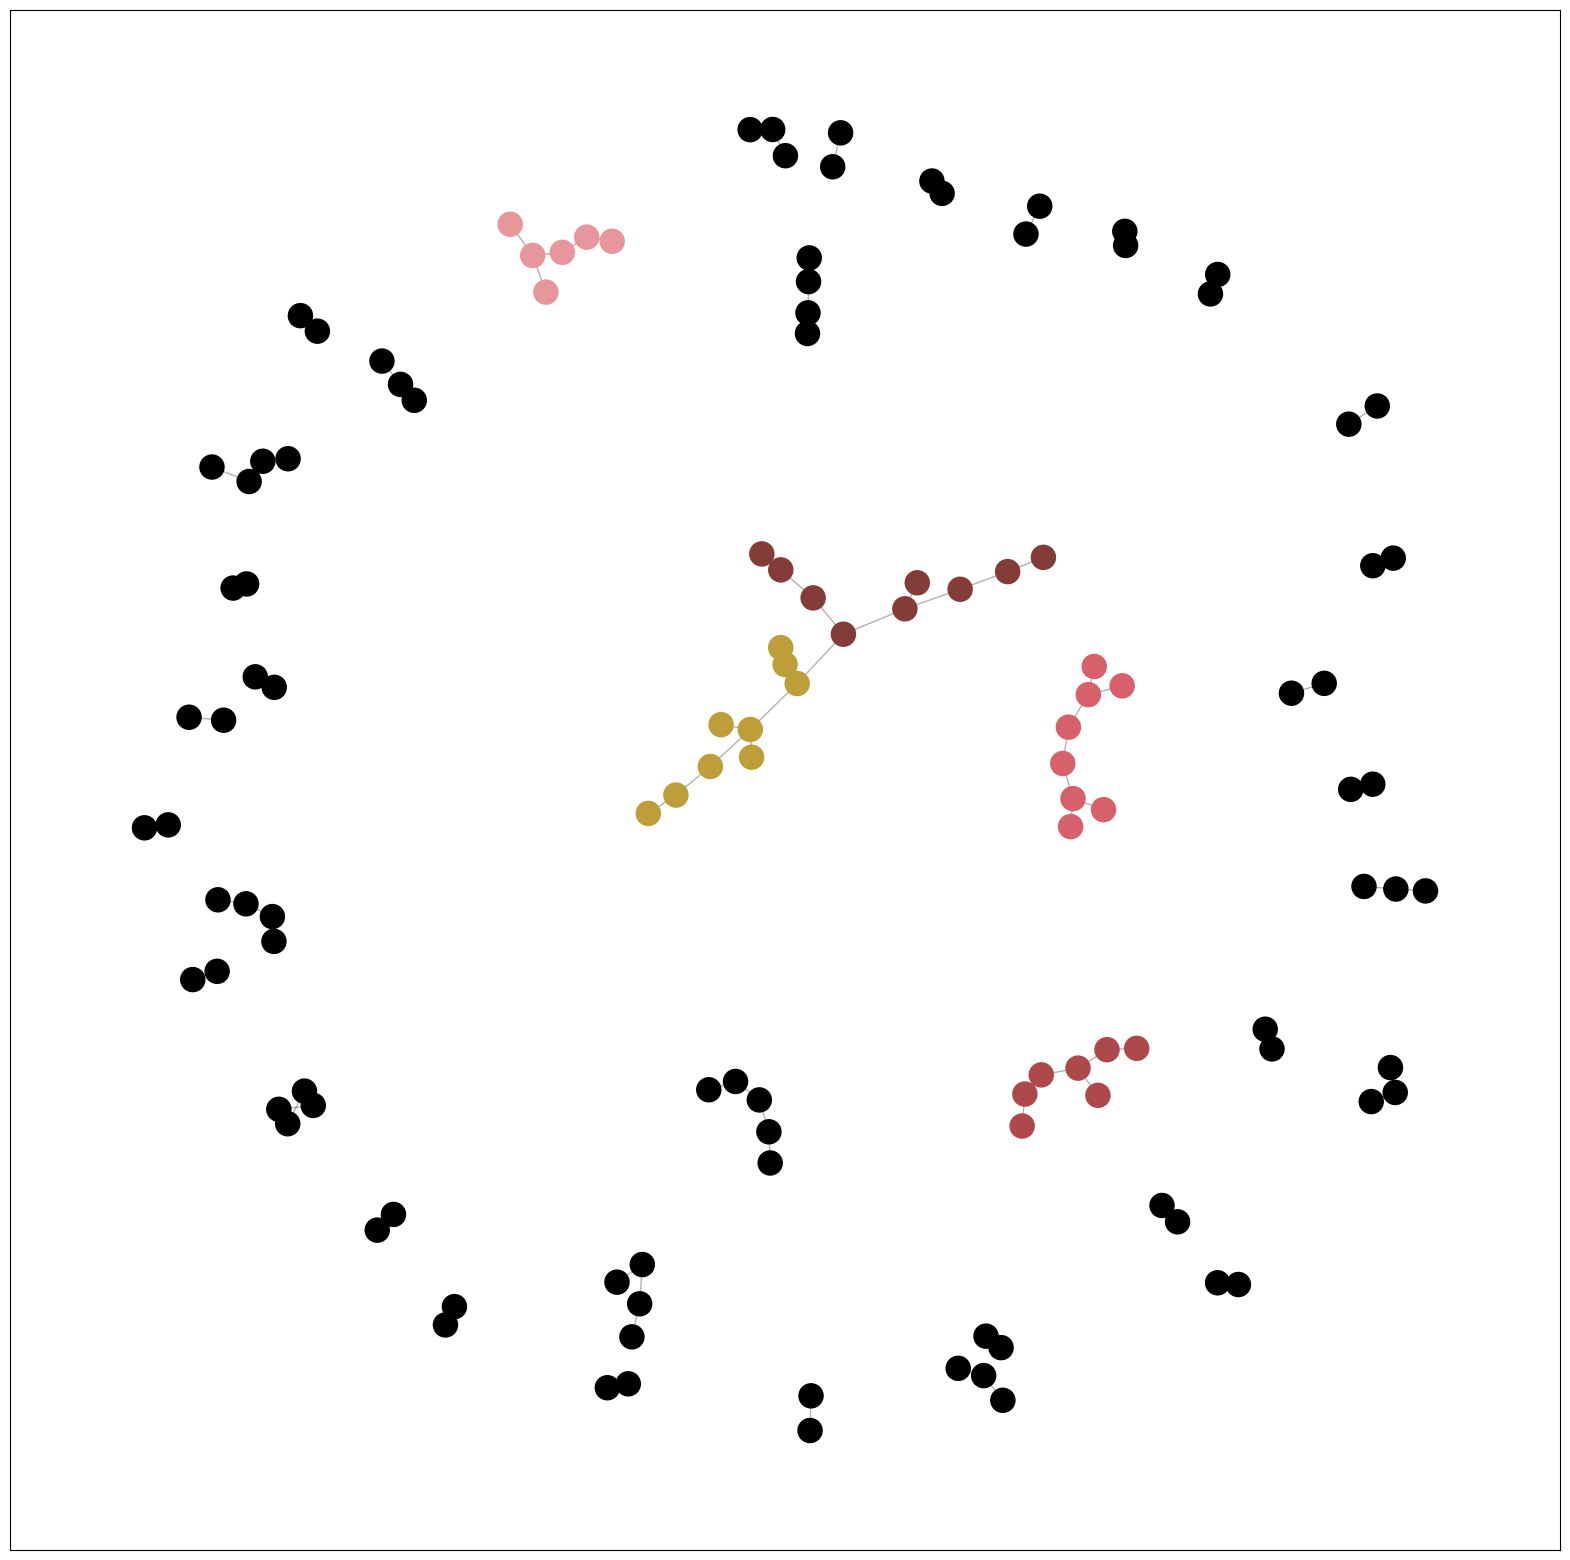

In [14]:
#Plot du graphe 

plt.figure(figsize=(20,20))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color = list_colors)
nx.draw_networkx_edges(G, pos, width = weights, alpha = 0.3)



plt.axis('equal')


In [113]:
communities = nx_comm.louvain_communities(G, resolution = 0.01)
communities



[{2, 3, 241},
 {8, 9},
 {14, 15, 138},
 {16, 17},
 {36, 37, 85},
 {82, 83},
 {86, 87},
 {96, 97},
 {114, 115},
 {125, 126},
 {142, 143},
 {149, 150},
 {153, 154, 249},
 {180, 181},
 {98, 99, 182, 219, 254, 342},
 {190, 191},
 {0, 1, 105, 137, 192},
 {239, 240},
 {246, 247, 270, 285},
 {251, 252, 268, 325},
 {260, 261},
 {278, 279},
 {287, 288, 299},
 {289, 290, 322, 332, 344, 355, 363, 374},
 {302, 303},
 {312, 313, 335, 364, 438},
 {348, 349},
 {4,
  5,
  6,
  7,
  10,
  11,
  12,
  13,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  84,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  100,
  101,
  102,
  103,
  104,
  106,
  107,
  108,
  109,
  110,
  111,
  11

In [171]:
# créer un dictionnaire de couleurs

# import seaborn as sns
# palette = sns.color_palette(None, len(communities))
# dico_color = {}
# for community in communities :
#     for node in community :
#         dico_color[node] = palette[communities.index(community)]
# dico_color
        



{241: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 2: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 3: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 8: (1.0, 0.4980392156862745, 0.054901960784313725),
 9: (1.0, 0.4980392156862745, 0.054901960784313725),
 138: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 14: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 15: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 16: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 17: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 4: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 5: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 6: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 7: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 10: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 11: (0.5803921568627

In [174]:
# palette1 = sns.color_palette('tab20b', len(communities))
# palette2 = sns.color_palette('tab20c', 20-len(communities))

# palette = palette1 + palette2
# print("len(communities)", len(communities))
# print("len(palette)", len(palette))


len(communities) 38
len(palette) 38


In [178]:
palette1

[(0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 (0.8705882352941177, 0.6196078431372549, 0.8392156862745098),
 (0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 (0.5490196078431373, 0.6352941176470588, 0.3215686274509804),
 (0.7098039215686275, 0.8117647058823529, 0.4196078431372549),
 (0.807843137254902, 0.8588235294117647, 0.611764705882353),
 (0.5490196078431373, 0.42745098039215684, 0.19215686274509805),
 (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 (0.9058823529411765, 0.7294117647058823, 0.3215686274509804),
 (0.9058823529411765, 0.796078431372549, 0.5803921568627451),
 (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 (0.8392156862745098, 0.3803921568627451, 0.4196078431372549),
 (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 (0.6470588235294118, 0.3176470588235294, 0.5803921568627451)]